In [134]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import os
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

df = pd.read_csv("CleanedData_AllPasses_discretized.csv")
print(df.columns)

relevant_columns = ['passInHull', 'receiverinHull', 'receiverIsOpen', 'isAlleyOOp', 'Success', 'HullArea_cluster_centroid', 'PassDist_cluster_centroid', 'ShotClock_cluster_centroid']
categorical_columns = ['passInHull', 'receiverinHull', 'receiverIsOpen', 'isAlleyOOp', 'Success']

for col in categorical_columns:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print("encoded", col)

df = df[relevant_columns]
df.head()

Index(['Unnamed: 0', 'GameID', 'Period', 'SportVUeventNum',
       'SportVUMomentIndex', 'reversedIndexBallCaught', 'PBPGameTime',
       'timeballpassed', 'timeballcaught', 'ShotClock', 'PasserID',
       'ReceiverID', 'PassDist', 'passInHull', 'receiverinHull', 'HullArea',
       'receiverIsOpen', 'PBP_HOMEDESCRIPTION', 'PBP_VISITORDESCRIPTION',
       'rawMoments', 'defensivePositions', 'isAlleyOOp', 'Success',
       'HullArea_cluster_centroid', 'PassDist_cluster_centroid',
       'ShotClock_cluster_centroid'],
      dtype='object')
encoded passInHull
encoded receiverinHull
encoded receiverIsOpen
encoded isAlleyOOp
encoded Success


,passInHull,receiverinHull,receiverIsOpen,isAlleyOOp,Success,HullArea_cluster_centroid,PassDist_cluster_centroid,ShotClock_cluster_centroid
0,0,1,0,0,0,123.656098,17.300095,22.531952
1,0,0,1,0,0,123.656098,52.068535,22.531952
2,1,0,0,0,0,123.656098,17.300095,22.531952
3,0,1,0,0,0,123.656098,52.068535,2.665992
4,0,1,0,0,0,62.305419,17.300095,22.531952


0.890572742475
[[2715  632]
 [ 415 5806]]


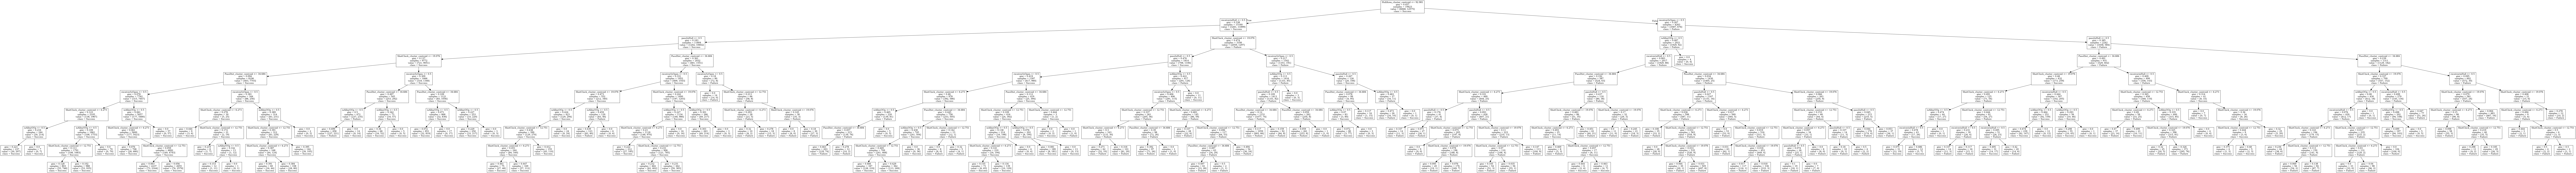

In [145]:
X = df[[x for x in relevant_columns if x != "Success"]]
y = df["Success"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)

clf = tree.DecisionTreeClassifier(random_state=7)
clf = clf.fit(X_train, y_train)

tree.export_graphviz(clf, out_file='tree.dot', class_names=["Failure", "Success"], feature_names=X.columns.values)
os.system("dot -Tpng tree.dot -o tree.png")

print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, clf.predict(X_test)))

Image(filename='tree.png')

0.858800167224
[[2433  940]
 [ 411 5784]]


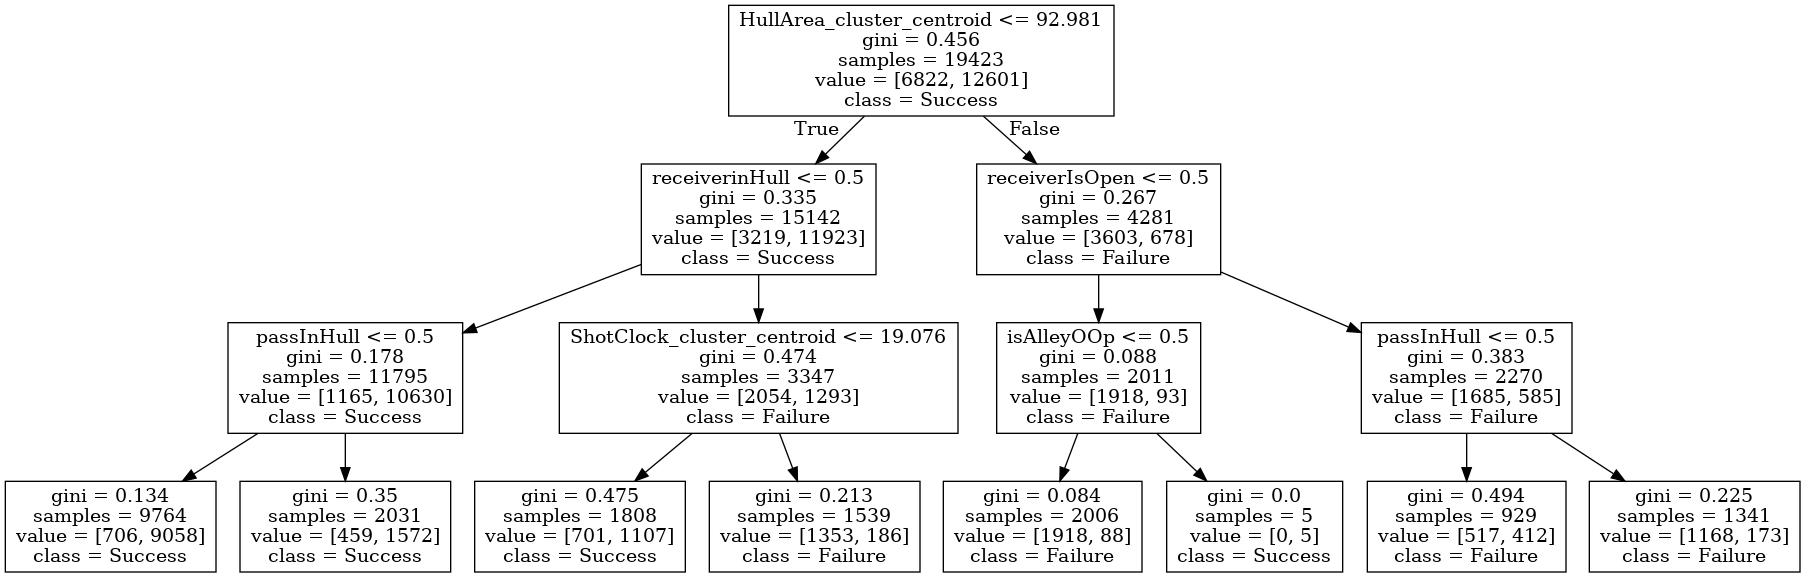

In [144]:
X = df[[x for x in relevant_columns if x != "Success"]]
y = df["Success"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

small_clf = tree.DecisionTreeClassifier(random_state=7, max_depth = 3)
small_clf = small_clf.fit(X_train, y_train)

tree.export_graphviz(small_clf, out_file='small_tree.dot', class_names=["Failure","Success"], feature_names=X.columns.values)
os.system("dot -Tpng small_tree.dot -o small_tree.png")

print(small_clf.score(X_test, y_test))
print(confusion_matrix(y_test, small_clf.predict(X_test)))

Image(filename='small_tree.png')

In [74]:
# Untuned SVM, for comparison
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train.values.ravel())
print(svm_clf.score(X_test, y_test))
confusion_matrix(y_test, svm_clf.predict(X_test))

0.890259197324


array([[2780,  593],
       [ 457, 5738]])

In [141]:
# Grid search for best parameter combination

params = {'criterion':('gini', 'entropy'),
          'max_depth':[2,11], 
          'max_features': [3,7],
          'min_samples_leaf': [1,10],
          'min_samples_split': [2, 5]}

gs = GridSearchCV(tree.DecisionTreeClassifier(), params)
gs_res = gs.fit(X_train, y_train)
gs_res.best_estimator_.score(X_test, y_test) # Not significantly better than the untuned model

0.89036371237458189